# インポート

In [1]:
import numpy as np
import sympy as sp
import pandas as pd
import csv as csv
import random
import scipy.integrate as scp
from scipy import optimize
from matplotlib import pyplot

# 熱情報の設定 

## 熱節点の情報をインポート

In [2]:

# 熱コンダクタンスが入っているファイルを開いて、csvで読み出す。そのあとリスト形式で文字列のまま読み出して二次元リストにする。
with open('Simple_Analysis.csv') as csv_file:
  f = csv.reader(csv_file, delimiter=",", doublequote=True, lineterminator="\r\n", quotechar='"', skipinitialspace=True)
  l = [[row_ij for row_ij in row_i] for row_i in f]


# ノード数の取得 列方向のサイズを取得し、最初の列はノード名なので1引く
# print(l[3][0] == [] )  ← これだめ
N_node = np.size(l, axis = 1) - 1

# ノード間の熱コンダクタンスを文字列の形で取得。二次元リストはスライスで一気に取ることはできないので、行についてはfor文で取得
# k_str = [l[2 + i][1:] for i in range(N_node)]
# r_str = [l[4 + N_node + i ][1:] if l[4 + N_node + i ][1:]=='N/A' else 0 for i in range(N_node)]
k_ij = np.arange(N_node * N_node, dtype = float).reshape(N_node, N_node)
r_ij = np.arange(N_node * N_node, dtype = float).reshape(N_node, N_node)

for i in range(N_node):
  for j in range(N_node):
    if (l[i + 2][j + 1] == 'N/A' or l[i + 2][j + 1] == '' or l[i + 2][j + 1] == '#N/A') == False :
      k_ij[i][j] = float(l[i + 2][j + 1])
    else:
      k_ij[i][j] = 0.0
    if (l[i + 4 + N_node][j + 1] == 'N/A' or l[i + 4 + N_node][j + 1] == '' or l[i + 2][j + 1] == '#N/A') == False :
      r_ij[i][j] = float(l[i + 4 + N_node][j + 1])
    else:
      r_ij[i][j] = 0.0

      
# k_str = [[float(l[2 + i][1 + j]) if (l[2+ i][1 + j] != 'N/A' and l[2+ i][1 + j] != '') else 0.0 for j in range(N_node)] for i in range(N_node)]
# r_str = [[l[4 + N_node + i][1+ j] if l[4 + N_node + i][1 + j] != 'N/A' else 0 for j in range(N_node)] for i in range(N_node)]


# print(bool(l[2][3] == "0"))
# print(type(l))
# print(np.shape(l))
#print(float(l[2][2]))
print(k_ij)
# print(r_str)


# csv_file = open('/content/gdrive/My Drive/Research/LOTUS/ThermalAnalyze/Thermal_Node_Definition.csv', "r", encoding="ms932", errors="", newline="" )
# #リスト形式
# f = csv.reader(csv_file, delimiter=",", doublequote=True, lineterminator="\r\n", quotechar='"', skipinitialspace=True)
# print(f.reader())

[[0.00000000e+00 1.33200000e+02 0.00000000e+00 1.50000000e-03
  0.00000000e+00 1.50000000e-03 0.00000000e+00]
 [1.33200000e+02 0.00000000e+00 3.00000000e-03 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 3.00000000e-03 0.00000000e+00 0.00000000e+00
  0.00000000e+00 9.95000000e+00 0.00000000e+00]
 [1.50000000e-03 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 3.30000000e-03 3.30000000e-03]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 2.60700000e+00]
 [1.50000000e-03 0.00000000e+00 9.95000000e+00 3.30000000e-03
  0.00000000e+00 0.00000000e+00 4.30909091e-01]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 3.30000000e-03
  2.60700000e+00 4.30909091e-01 0.00000000e+00]]


## 熱伝導係数を保持するクラス

In [3]:
class Cond:
  def __init__(self, K_ij=0, R_ij=0):
    self.K_ij = K_ij
    self.R_ij = R_ij

## 各ノードの熱入出力や熱特性を保持するクラス

In [193]:
# Initialize Cond class class matrix
def init_cond(k_mat, r_mat):
  Cond_N = [[Cond(0,0) for i in range(len(k_mat[0]))] for j in range(len(k_mat[0]))]
  for Cond_N_i , k_i, r_i in zip(Cond_N, k_mat, r_mat):
    for Cond_N_ij, k_ij, r_ij in zip(Cond_N_i, k_i, r_i):
      Cond_N_ij.K_ij = k_ij
      Cond_N_ij.R_ij = r_ij
  return Cond_N

In [194]:
Cond_N = init_cond(k_ij, r_ij)
# ちゃんと格納されているか
print(Cond_N[0][1].K_ij)

133.2


## 衛星座標系の設定

In [195]:
# 座標変換行列
# C_b_to_i = 
# C_lvlh_to_i =

In [196]:
# 軌道情報


In [197]:
# 方向余弦を返す関数
def direction_cosine(a, b, c):
    return (np.array([np.cos(a), np.cos(b), np.cos(c)]))

In [198]:
# 機体固定座標からみた太陽方向(とりあえず今は固定させている)
sun_vec_from_b = direction_cosine(np.pi/4, np.pi/4, np.pi/2)
print(sun_vec_from_b)

# 機体固定座標絡みた地球方向(とりあえず今は固定させている)
earth_vec_from_b = direction_cosine(np.pi/2, np.pi/2, np.pi)
print(earth_vec_from_b)

# 衛星-地球-太陽の角度 80degくらいに設定
sat_earth_sun_angle=np.pi/2.5

[7.07106781e-01 7.07106781e-01 6.12323400e-17]
[ 6.123234e-17  6.123234e-17 -1.000000e+00]


In [199]:
# 衛星パネルクラス 熱計算をするときにこの情報からCondクラスに代入していく
class Panel:
    def __init__(self, width=0, height=0, thick=0, sp_cap=0, Q=0, angle_of_sun=0, angle_of_earth=0):
        self.width=width
        self.height=height
        self.area = width*height
        self.thick=thick
        self.sp_cap=sp_cap
        self.Q=Q
        self.angle_of_sun=angle_of_sun
        self.angle_of_earth=angle_of_earth
        self.cap=sp_cap*width*height*thick
        
    # 比熱容量を設定
    def update_capacity(self):
        self.cap=self.sp_cap*self.width*self.height*self.thick
    # パネル面積を設定
    def update_area(self):
        self.area=self.width*self.height
        

# 衛星外部パネルクラス Panelクラスを継承 太陽方向ベクトルとの内積計算のために法線ベクトルを追加する
class Ex_Panel(Panel):
    def __init__(self, width=0, height=0, thick=0, sp_cap=0, Q=0, angle_of_sun=0, angle_of_earth=0, F_pe=0, eps=0, alpha=0, n_vec=np.array([0.0, 0.0, 0.0])):
        self.width=width
        self.height=height
        self.area = width*height
        self.thick=thick
        self.sp_cap=sp_cap
        self.Q=Q
        self.angle_of_sun=angle_of_sun
        self.angle_of_earth=angle_of_earth
        self.F_pe = F_pe
        self.eps = eps
        self.alpha = alpha
        self.n_vec=n_vec
        self.cap=sp_cap*width*height*thick
        
    # 地球との形態係数
    def view_factor_plate_sphere(self, h, beta=False):
#         h = H/R
        if beta == False:
            beta=self.angle_of_earth
        if beta>np.pi/2:
            self.F_pe = 0
            return 0

        if beta-np.pi/2+np.arcsin(1/h)<0:
            self.F_pe=np.cos(beta)/h**2
        else:
            x=np.sqrt(h**2-1)/np.tan(beta)
            y=np.sqrt(1-x**2)
            self.F_pe=np.cos(beta)/np.pi/h/h*(np.pi-np.arccos(x)-x*y*(np.tan(beta))**2)+1.0/np.pi*np.arctan(y/x*np.cos(beta))
        return self.F_pe

In [200]:
# LOTUSの情報をいれる
PX_Panel = Ex_Panel(width=300E-3, height=400E-3, thick=4, n_vec=np.array([1.0, 0.0, 0.0]))
MX_Panel = Ex_Panel(width=300E-3, height=400E-3, thick=4, n_vec=np.array([-1.0, 0.0, 0.0]))

PY_Panel = Ex_Panel(width=300E-3, height=400E-3, thick=4, n_vec=np.array([0.0, 1.0, 0.0]))
MY_Panel = Ex_Panel(width=300E-3, height=400E-3, thick=4, n_vec=np.array([0.0, -1.0, 0.0]))

PZ_Panel = Ex_Panel(width=300E-3, height=300E-3, thick=4, sp_cap=3, n_vec=np.array([0.0, 0.0, 1.0]))
MZ_Panel = Ex_Panel(width=300E-3, height=300E-3, thick=4, n_vec=np.array([0.0, 0.0, -1.0]))

In [201]:
print(PX_Panel.width)
PX_Panel.update_capacity()
PX_Panel.update_area()
print(PX_Panel.area)

0.3
0.12


In [202]:
# 太陽方向ベクトルとの内積を考える
print(np.dot(PX_Panel.n_vec, sun_vec_from_b))
print(np.dot(MX_Panel.n_vec, sun_vec_from_b))

print(np.dot(PY_Panel.n_vec, sun_vec_from_b))
print(np.dot(MY_Panel.n_vec, sun_vec_from_b))

print(np.dot(PZ_Panel.n_vec, sun_vec_from_b))
print(np.dot(MZ_Panel.n_vec, sun_vec_from_b))

0.7071067811865476
-0.7071067811865476
0.7071067811865476
-0.7071067811865476
6.123233995736766e-17
-6.123233995736766e-17


In [203]:
# ベクトルのなす角を計算
def angle_of_vector(vec1, vec2):
    cos=np.dot(vec1, vec2)/np.linalg.norm(vec1, ord=2)/np.linalg.norm(vec2, ord=2)
    if cos < -1.0:
        cos = -1
    elif cos > 1.0:
        cos = 1
    return np.arccos(cos)

## 形態係数の式
http://www1.accsnet.ne.jp/~aml00731/c/thermal/View_Factor.pdf (微小平板の式を用いた）

In [204]:
# パネルへの各熱入力に対する形態係数を計算する
def view_factor_plate_sphere(h, beta):
#     h = H/R
    if beta>np.pi/2:
        return 0
    
    if beta-np.pi/2+np.arcsin(1/h)<0:
        F_12=np.cos(beta)/h**2
    else:
        x=np.sqrt(h**2-1)/np.tan(beta)
        y=np.sqrt(1-x**2)
        F_12=np.cos(beta)/np.pi/h/h*(np.pi-np.arccos(x)-x*y*(np.tan(beta))**2)+1.0/np.pi*np.arctan(y/x*np.cos(beta))
    return F_12

In [205]:
view_factor_plate_sphere(2, np.pi/2)

0.02883444281121869

In [206]:
# F_12をプロットしてみる
h=np.linspace(1.0000001,2,100)
F_12=np.zeros_like(h)
for i in range(len(h)):
    F_12[i]=view_factor_plate_sphere(h[i], np.pi/2)

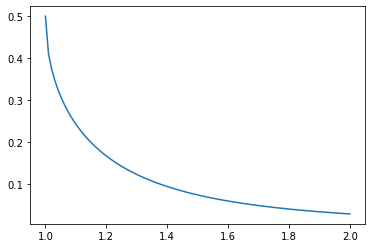

In [207]:
pyplot.plot(h, F_12)

In [208]:
# 太陽熱入力 1399[W/m]
E_s = 1353
# 地球赤外放射 264[W/m]
E_e = 237
# アルベド係数
alb_co = 0.60

In [209]:
# 地球半径 Re
Re = 6378
alt = 800
h_for_vf=(Re+alt)/Re
view_factor_plate_sphere(h_for_vf, np.pi/2)

0.21852622510204706

In [210]:
# 吸収率と放射率
alpha_s_osr = 0.077
eps_osr = 0.79
alpha_s_sap = 0.9
eps_sap = 0.8

In [211]:
# SAPの効率
efficiency_sap = 0.3

In [212]:
# 放熱面面積の割合
radiator_rate = 0.6
A_all = PX_Panel.area+MX_Panel.area+PY_Panel.area+MY_Panel.area+PZ_Panel.area+MZ_Panel.area
A_rad = radiator_rate*A_all
print(A_rad)

0.39599999999999996


In [213]:
# パネルと太陽、地球との角度を計算
PX_Panel.angle_of_sun = angle_of_vector(PX_Panel.n_vec, sun_vec_from_b)
MX_Panel.angle_of_sun = angle_of_vector(MX_Panel.n_vec, sun_vec_from_b)
PY_Panel.angle_of_sun = angle_of_vector(PX_Panel.n_vec, sun_vec_from_b)
MY_Panel.angle_of_sun = angle_of_vector(MY_Panel.n_vec, sun_vec_from_b)
PZ_Panel.angle_of_sun = angle_of_vector(PZ_Panel.n_vec, sun_vec_from_b)
MZ_Panel.angle_of_sun = angle_of_vector(MZ_Panel.n_vec, sun_vec_from_b)

PX_Panel.angle_of_earth = angle_of_vector(PX_Panel.n_vec, earth_vec_from_b)
MX_Panel.angle_of_earth = angle_of_vector(MX_Panel.n_vec, earth_vec_from_b)
PY_Panel.angle_of_earth = angle_of_vector(PX_Panel.n_vec, earth_vec_from_b)
MY_Panel.angle_of_earth = angle_of_vector(MY_Panel.n_vec, earth_vec_from_b)
PZ_Panel.angle_of_earth = angle_of_vector(PZ_Panel.n_vec, earth_vec_from_b)
MZ_Panel.angle_of_earth = angle_of_vector(MZ_Panel.n_vec, earth_vec_from_b)

In [214]:
# 衛星の入熱（太陽からの入熱）
PX_Panel.Q=alpha_s_sap*PX_Panel.area*max(0,np.cos(PX_Panel.angle_of_sun))*E_s*(1-efficiency_sap)
MX_Panel.Q=alpha_s_sap*MX_Panel.area*max(0,np.cos(MX_Panel.angle_of_sun))*E_s*(1-efficiency_sap)
PY_Panel.Q=alpha_s_sap*PY_Panel.area*max(0,np.cos(PY_Panel.angle_of_sun))*E_s*(1-efficiency_sap)
MY_Panel.Q=alpha_s_sap*MY_Panel.area*max(0,np.cos(MY_Panel.angle_of_sun))*E_s*(1-efficiency_sap)
PZ_Panel.Q=alpha_s_sap*PZ_Panel.area*max(0,np.cos(PZ_Panel.angle_of_sun))*E_s*(1-efficiency_sap)
MZ_Panel.Q=alpha_s_sap*MZ_Panel.area*max(0,np.cos(MZ_Panel.angle_of_sun))*E_s*(1-efficiency_sap)

# 衛星の入熱（地球からの赤外入熱）
PX_Panel.Q+=alpha_s_sap*PX_Panel.area*max(0,np.cos(PX_Panel.angle_of_earth))*E_e*view_factor_plate_sphere(h_for_vf, PX_Panel.angle_of_earth)
MX_Panel.Q+=alpha_s_sap*MX_Panel.area*max(0,np.cos(MX_Panel.angle_of_earth))*E_e*view_factor_plate_sphere(h_for_vf, MX_Panel.angle_of_earth)
PY_Panel.Q+=alpha_s_sap*PY_Panel.area*max(0,np.cos(PY_Panel.angle_of_earth))*E_e*view_factor_plate_sphere(h_for_vf, PY_Panel.angle_of_earth)
MY_Panel.Q+=alpha_s_sap*MY_Panel.area*max(0,np.cos(MY_Panel.angle_of_earth))*E_e*view_factor_plate_sphere(h_for_vf, MY_Panel.angle_of_earth)
PZ_Panel.Q+=alpha_s_sap*PZ_Panel.area*max(0,np.cos(PZ_Panel.angle_of_earth))*E_e*view_factor_plate_sphere(h_for_vf, PZ_Panel.angle_of_earth)
MZ_Panel.Q+=alpha_s_sap*MZ_Panel.area*max(0,np.cos(MZ_Panel.angle_of_earth))*E_e*view_factor_plate_sphere(h_for_vf, MZ_Panel.angle_of_earth)

# 衛星の入熱（地球からの赤外入熱）
PX_Panel.Q+=alpha_s_sap*PX_Panel.area*max(0,np.cos(PX_Panel.angle_of_earth))*alb_co*E_s*np.cos(sat_earth_sun_angle)*view_factor_plate_sphere(h_for_vf, PX_Panel.angle_of_earth)
MX_Panel.Q+=alpha_s_sap*MX_Panel.area*max(0,np.cos(MX_Panel.angle_of_earth))*alb_co*E_s*np.cos(sat_earth_sun_angle)*view_factor_plate_sphere(h_for_vf, MX_Panel.angle_of_earth)
PY_Panel.Q+=alpha_s_sap*PY_Panel.area*max(0,np.cos(PY_Panel.angle_of_earth))*alb_co*E_s*np.cos(sat_earth_sun_angle)*view_factor_plate_sphere(h_for_vf, PY_Panel.angle_of_earth)
MY_Panel.Q+=alpha_s_sap*MY_Panel.area*max(0,np.cos(MY_Panel.angle_of_earth))*alb_co*E_s*np.cos(sat_earth_sun_angle)*view_factor_plate_sphere(h_for_vf, MY_Panel.angle_of_earth)
PZ_Panel.Q+=alpha_s_sap*PZ_Panel.area*max(0,np.cos(PZ_Panel.angle_of_earth))*alb_co*E_s*np.cos(sat_earth_sun_angle)*view_factor_plate_sphere(h_for_vf, PZ_Panel.angle_of_earth)
MZ_Panel.Q+=alpha_s_sap*MZ_Panel.area*max(0,np.cos(MZ_Panel.angle_of_earth))*alb_co*E_s*np.cos(sat_earth_sun_angle)*view_factor_plate_sphere(h_for_vf, MZ_Panel.angle_of_earth)

In [215]:
Q_in = PX_Panel.Q + MX_Panel.Q + PY_Panel.Q + MY_Panel.Q + PZ_Panel.Q + MZ_Panel.Q
Q_in

175.85450010636714

In [216]:
print(PX_Panel.Q)
print(MX_Panel.Q)
print(PY_Panel.Q)
print(MY_Panel.Q)
print(PZ_Panel.Q)
print(MZ_Panel.Q)

72.32768990587215
0.0
72.32768990587215
0.0
4.697445083063455e-15
31.19912029462286


## TEC(Thermal Electric Cooler)のモデル化

### 参考ホームページ
https://fluffyandflakey.blog/2019/08/29/cooling-a-cpu-with-tecs/
https://www.qats.com/DataSheet/TEC_Modules (このファイルはこっちの式を採用)
https://www.meerstetter.ch/compendium/tec-peltier-element-design-guide (TECのスペック選びに使った)

\begin{align}
Q_c &= 2N \{S_{AB} I T_c - 2N \frac{k \rho}{R} (T_h - T_c) \} - \frac{1}{2} I^2 R \\
Q_h &= 2N \{S_{AB} I T_h - 2N \frac{k \rho}{R} (T_h - T_c) \} + \frac{1}{2} I^2 R \\
V &= 2N\{S_{AB} (T_h - T_c)\} + IR \\
COP &= \frac{Q_c}{VI} = \frac{2N\{S_{AB} I T_c - 2N\frac{k \rho}{R}(T_h-T_c)\}-\frac{1}{2}I^2 R}{VI}
\end{align}

\begin{align}
  & N : \text{The number of couples} && [-] \\
  & I : \text{Electric current passing through the Peltier} && [A] \\
  &V : \text{The voltage across TEC module} &&[V]\\
  &Q_c  : \text{Absorbed power on the Peltier cold side} && [W] \\
  &Q_h : \text{Power rejected by the Peltier hot side} &&[W]\\
  &S_{ab} : \text{the Seebeck coefficient} &&[V/K]\\
  &k : \text{Thermal conductivity of the module} &&[W/m \cdot K]\\
  &R : \text{Electric resistance of the module} &&[\Omega]\\
  &\rho : \text{Electrical resistivity} &&[\Omega \cdot m]\\
  &T_c : \text{Cold side temperature} &&[K] \\
  &T_h : \text{Hot side temperature} &&[K] \\
  &\Delta T = T_h - T_c : \text{Temperature difference} &&[K]\\
\end{align}

In [217]:
# ペルチェに関するクラス
class Peltier: 
    def __init__(self, sm=200e-6, km=1.5, rm=3.02, n=127, rho=10e-6):
        self.Sm_ab = sm
        self.Km = km
        self.Rm = rm
        self.Nm = n
        self.Rho = rho
  
    def cAlculate_Voltage(self, DT, I):
        return 2 * self.Nm * self.Sm_ab * DT + self.Rm * I
  
    def cAlculate_QC(self, TC, DT, I):
        return 2 * self.Nm * (self.Sm_ab*TC*I-2*self.Nm*self.Km*self.Rho/self.Rm*DT) - 0.5*self.Rm*I*I
  
    def cAlculate_QH(self, TH, DT, I):
        return 2 * self.Nm * (self.Sm_ab*TH*I-2*self.Nm*self.Km*self.Rho/self.Rm*DT) + 0.5*self.Rm*I*I
    
    def cAlculate_COP(self, TC, DT, I):
        V = self.cAlculate_Voltage(DT, I)
        QC = self.cAlculate_QC(TC, DT, I)
        return QC/(V*I)
    # Qc = 0 とおいてDTについて解く
    def cAlculate_DTmax(self, TH, I):
        return (self.Sm_ab * I * TH - I * I * self.Rm / (4.0 * self.Nm))/(self.Sm_ab * I + 2.0 * self.Nm * self.Km * self.Rho / self.Rm)
    def cAlculate_I_argmax_COP(self, TC, DT):
        I_cop_max = (4.0*self.Rho*self.Km*self.Nm*DT/(self.Sm_ab*self.Rm*(TC+TC+DT))*(1.0+np.sqrt(1+self.Sm_ab**2/2.0/self.Rho/self.Km*(TC+TC+DT))))
        return I_cop_max

In [218]:
# ペルチェクラスの初期化
pel = Peltier()

## TECの曲線のグラフ化

 ### $Q_C$ v.s. $\Delta T$

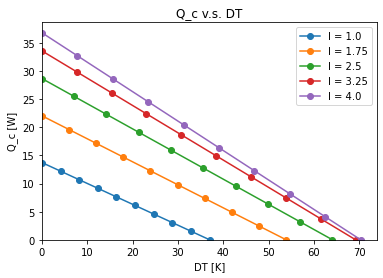

In [219]:
TH_graph = 300
I_graph_list = np.linspace(1.0, 4.0, 5)

for I_graph in I_graph_list:
    DT_max = pel.cAlculate_DTmax(TH_graph, I_graph)
    DT_graph = np.linspace(0.0, DT_max, 10)
    QC_graph = pel.cAlculate_QC(TH_graph-DT_graph, DT_graph, I_graph)
    pyplot.plot(DT_graph, QC_graph, '-o', label = 'I = {0}'.format(I_graph))

pyplot.title('Q_c v.s. DT')
pyplot.xlabel('DT [K]')
pyplot.ylabel('Q_c [W]')
pyplot.legend()
pyplot.xlim(0,)
pyplot.ylim(0,)
pyplot.show()

 ### $V$ v.s. $\Delta T$

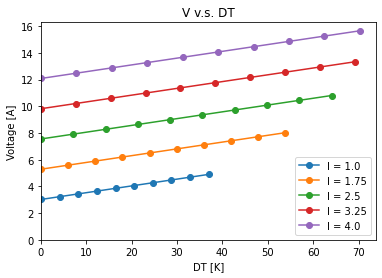

In [220]:
for I_graph in I_graph_list:
    DT_max = pel.cAlculate_DTmax(TH_graph, I_graph)
    DT_graph = np.linspace(0.0, DT_max, 10)
    V_graph = pel.cAlculate_Voltage(DT_graph, I_graph)
    pyplot.plot(DT_graph, V_graph, '-o', label = 'I = {0}'.format(I_graph))

pyplot.title('V v.s. DT')
pyplot.xlabel('DT [K]')
pyplot.ylabel('Voltage [A]')
pyplot.legend()
pyplot.xlim(0,)
pyplot.ylim(0,)
pyplot.show()

### $COP$ v.s. $I$

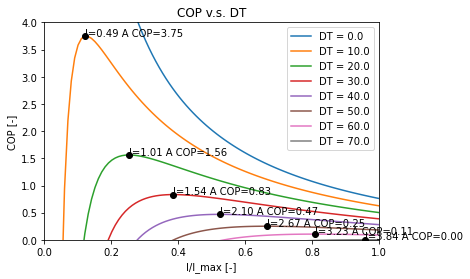

In [221]:
I_max = 4.0
DT_COP_list = np.linspace(0, 70, 8)
I_COP_graph = np.linspace(1.0e-4, 1, 100) * I_max

# DTによってCOPが最大になるIを格納
COP_max_value_list = []
I_max_by_COP_list = []

# COPとIをそれぞれfor文で回してリストを作成
for DT_COP_graph in DT_COP_list:
    COP_graph = []
    for I_COP in I_COP_graph:
        COP_graph.append(pel.cAlculate_COP(TH_graph - DT_COP_graph, DT_COP_graph, I_COP))
    COP_max_value = max(COP_graph)
    I_max_by_COP = I_COP_graph[COP_graph.index(COP_max_value)]
    COP_max_value_list.append(COP_max_value)
    I_max_by_COP_list.append(I_max_by_COP)
    pyplot.plot(I_COP_graph/I_max, COP_graph, '-', label = 'DT = {0}'.format(DT_COP_graph))

pyplot.plot(np.array(I_max_by_COP_list)/I_max, COP_max_value_list, 'ok')
for I_max_by_COP, COP_max_value in zip(I_max_by_COP_list, COP_max_value_list):
    if COP_max_value < 4.0:
        pyplot.text(I_max_by_COP/I_max, COP_max_value, 'I={0:.2f} A COP={1:.2f}'.format(I_max_by_COP,COP_max_value))
pyplot.title('COP v.s. DT')
pyplot.xlabel('I/I_max [-]')
pyplot.ylabel('COP [-]')
pyplot.legend()
pyplot.xlim(0,1.0)
pyplot.ylim(0,4)
pyplot.show()

### $COP$ v.s. $I$ 微分が正しいかどうかの確認

\begin{align}
COP &= \frac{Q_c}{VI} = \frac{2N\{S_{AB} I T_c - 2N\frac{k \rho}{R}(T_h-T_c)\}-\frac{1}{2}I^2 R}{\{2N\{S_{AB} (T_h - T_c)\} + IR\}I} \\
&= \frac{a_2I^2+a_1I+a_0}{b_2I^2+b_1I}
\end{align}

In [222]:
# DT=20のとき
a2 = -0.5*pel.Rm
a1 = 2.0*pel.Nm*pel.Sm_ab*(TH_graph-20)
a0 = -4*pel.Nm**2*pel.Km*pel.Rho/pel.Rm*20
b2 = pel.Rm
b1 = 2.0*pel.Sm_ab*pel.Nm*20
print("a2={0}\na1={1}\na0={2}\nb2={3}\nb1={4}".format(a2,a1,a0,b2,b1))

a2=-1.51
a1=14.224000000000002
a0=-6.40887417218543
b2=3.02
b1=1.016


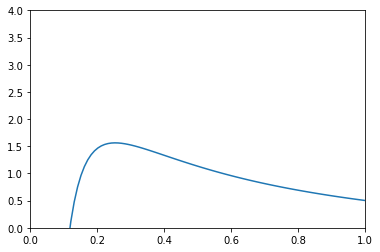

In [223]:
COP_graph_confirm=(a2*I_COP_graph**2+a1*I_COP_graph+a0)/(b2*I_COP_graph**2+b1*I_COP_graph)
pyplot.plot(I_COP_graph/I_max, COP_graph_confirm, '-')
pyplot.xlim(0,1.0)
pyplot.ylim(0,4)
pyplot.show()

$COP$が最大になる$I$は以下の式

\begin{align}
    I_{@maxCOP}=\frac{4\rho k N (T_h-T_c)}{S_{AB} R (T_h-T_c)} \{ 1+\sqrt{1+\frac{{S_{AB}}^2}{2 \rho k}(T_h+T_c)} \}
\end{align}

In [224]:
# I_max_COP = 4.0*pel.Rho*pel.Km*pel.Nm*20/(pel.Sm_ab*pel.Rm*(TH_graph+TH_graph-20))*(1.0+np.sqrt(1+pel.Sm_ab**2/2.0/pel.Rho/pel.Km*(TH_graph+TH_graph-20)))
I_max_COP = pel.cAlculate_I_argmax_COP(TH_graph-DT_COP_list, DT_COP_list)
print(I_max_COP)

[0.         0.49964554 1.01434643 1.54488257 2.09208936 2.65686276
 3.24016488 3.84303024]


# TEC制御

\begin{align}
  &C_o = 29.48 : \text{Capacity of the object} && [J/K] \\
  &C_{s1} = 3.6 : \text{Capacity of the cold side of the Peltier} && [J/K] \\
  &C_{s2} = 3.6 : \text{Capacity of the cold side of the Peltier} &&[J/K]\\
  &K_{o,s1} = 1.8 : \text{Conductivity between the object and the cold side of the Peltier} &&[W/K]\\
  &R_{s2,a} = 1.53e-10 : \text{Conductivity of the cold side of the Peltier} &&[W/K^4]\\
\end{align}

In [228]:
# # 初期状態
# T0 = [263, 263, 263, 3]
# C = [29.48, 3.6, 3.6, 1e+10]
# Qg = [1, 0, 0, 0]
# I = 0
# 消費電力
P_gen = 50

# TECに供給する電力
P_tec = 4
# COPはとりあえず2くらい
COP_tec = 2
# QcはCOP*供給電力
Qc_tec = P_tec * COP_tec
# ステファンボルツマン定数
sigma = 5.669E-8

T0 = [273, 273, 273, 273, 273, 273, 273]
T_obj_list = np.linspace(200, 270, 100)
P_gen_list = np.linspace(10, 50, 100)
# C=[1000, 1000, 1000, 1000, 1000, 1000, 1000]
C =  [18.3, 15.0, 15.0, 976.8, 29191.7, 2043.4, 2043.4]
Qg = [1.0, 0, 0, 0, 0, 0, 0]

In [105]:
# 制御パラメータ
# Kp = 0.0001
# Kd = 0.0001

In [106]:
# 目標値
# T_obj_d = 213

In [107]:
# 熱伝導方程式
def dT_dt(T, Cond_N, C, Qg):
    dTdt=[]
    for T_i, Cond_N_i, C_i, Qg_i in zip(T, Cond_N, C, Qg):
        Q_cond_i = 0
        for Cond_N_ij, T_j in zip(Cond_N_i,T):
            Q_cond_i += Cond_N_ij.K_ij*(T_i - T_j) + Cond_N_ij.R_ij*(T_i**4 - T_j**4)
        dTdt.append((Qg_i - Q_cond_i)/C_i)
    return dTdt

In [108]:
# dT_dt(T0, Cond_N, C, Qg)

In [109]:
# def system(t, x):
#     global I
#     dI = - Kp * (T_obj_d - x[1]) - Kd * dT_dt(x, Cond_N, C, Qg)[1]
#     I = I + dI
#     if I>0:
#         I = min(I_max, I)
#     else:
#         I = 0
#     Qg[1] = pel.cAlculate_QC(x[1], x[2]-x[1], I)
#     Qg[2] = pel.cAlculate_QH(x[2], x[2]-x[1], I)
    
#     y = dT_dt(x, Cond_N, C, Qg)
#     return y

In [110]:
# def simulation(x0, end, step):
#     T_obj = []
#     t = []
#     I_rec = []
#     ode =  scp.ode(system)
#     ode.set_integrator('dopri5', method='bdf', atol=1.0e-2)
#     ode.set_initial_value(x0, 0)
#     t.append(0)
#     T_obj.append(x0[0])
#     I_rec.append(0)
#     while ode.successful() and ode.t < end - step:
#         ode.integrate(ode.t + step)
#         t.append(ode.t)
#         T_obj.append(ode.y[1])
#         I_rec.append(I)
#     return T_obj, I_rec, t

In [111]:
# def Q_generated(T):
#     Gg=

In [112]:
def system(t, x):
    Qg[1]= -Qc_tec
    Qg[2]= P_tec+Qc_tec
    Qg[4]= P_gen
    Qg[5]= -eps_osr*1.0*sigma*A_rad*(x[5]**4 - 4**4)
    Qg[6]= Q_in - eps_sap*1.0*sigma*(A_all-A_rad)*(x[6]**4 - 4**4)
    
    y = dT_dt(x, Cond_N, C, Qg)
    return y

In [124]:
# TEC制御なしバージョン
def simulation(x0, end, step):
    T_obj = []
    T_tec_c = []
    T_tec_h = []
    T_ins = []
    T_pgen = []
    T_out = []
    T_in = []
    t = []
    ode =  scp.ode(system)
    ode.set_integrator('dopri5', method='bdf', atol=1.0e-2)
    # 最小値は0(絶対零度)にクリッピングさせる
    x0=np.clip(x0, 0.0, None)
    ode.set_initial_value(x0, 0)
    t.append(0)
    T_obj.append(x0[0])
    T_tec_c.append(x0[1])
    T_tec_h.append(x0[2])
    T_ins.append(x0[3])
    T_pgen.append(x0[4])
    T_out.append(x0[5])
    T_in.append(x0[6])
    while ode.successful() and ode.t < end - step:
        # 最小値をゼロにクリッピングさせる
        ode.y[0:6]=np.clip(ode.y[0:6], 0.0, None)
        ode.integrate(ode.t + step)
        t.append(ode.t)
        T_obj.append(ode.y[0])
        T_tec_c.append(ode.y[1])
        T_tec_h.append(ode.y[2])
        T_ins.append(ode.y[3])
        T_pgen.append(ode.y[4])
        T_out.append(ode.y[5])
        T_in.append(ode.y[6])
    return T_obj, T_tec_c, T_tec_h, T_ins, T_pgen, T_out, T_in, t

### シミュレーション開始

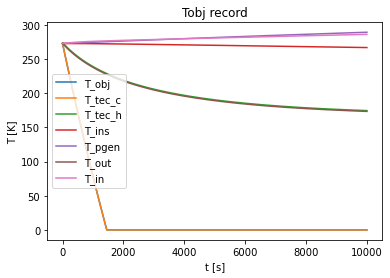

In [125]:
I = 0
end = 10000
step = 1

T_obj, T_tec_c, T_tec_h, T_ins, T_pgen, T_out, T_in, t = simulation(T0, end, step)

# 
pyplot.title('Tobj record')
pyplot.xlabel('t [s]')
pyplot.ylabel('T [K]')
pyplot.plot(t, T_obj,'-', label = "T_obj")
pyplot.plot(t, T_tec_c,'-', label = "T_tec_c")
pyplot.plot(t, T_tec_h,'-', label = "T_tec_h")
pyplot.plot(t, T_ins,'-', label = "T_ins")
pyplot.plot(t, T_pgen,'-', label = "T_pgen")
pyplot.plot(t, T_out,'-', label = "T_out")
pyplot.plot(t, T_in,'-', label = "T_in")
pyplot.legend()
pyplot.show()

# pyplot.title('I record')
# pyplot.xlabel('t [s]')
# pyplot.ylabel('I [A]')
# pyplot.plot(t, I_record,'-')
# pyplot.show()

In [126]:
T_tec_c[-1]

-0.18041015788480919

In [296]:
# 定常状態を非線形連立方程式で解く
# def func(x):
#     y = []
#     y.append(200 + 50*(x[0]-x[1])+100*(x[0]**4-x[1]**4))
#     y.append(100 + 10*(x[1]-x[1])+50*(x[1]**4-x[0]**4))
#     return y

In [297]:
# def func(x):
#     return [200 + 50*(x[0]-x[1])+100*(x[0]**4-x[1]**4),
#             100 + 10*(x[1]-x[1])+50*(x[1]**4-x[0]**4)]

In [298]:
# result = optimize.root(func, [0.0, 0.0], method="broyden1")
# print(result)

In [127]:
# 定常状態を非線形連立方程式で解く（dT/dtを利用した場合）
# TECを動かす前
def func1(x):
#     Qg[1]= -Qc_tec
#     Qg[2]= P_tec+Qc_tec
#     Qg[1] = (4.0*pel.Rho*pel.Km*pel.Nm*(x[2]-x[1])/(pel.Sm_ab*pel.Rm*(x[1]+x[2]))*(1.0+np.sqrt(1+pel.Sm_ab**2/2.0/pel.Rho/pel.Km*(x[1]+x[2]))))
#     I_cpmax = pel.cAlculate_I_argmax_COP(x[1], x[2]-x[1])
#     Qg[1]= - pel.cAlculate_QC(x[1], x[2]-x[1], I_cpmax)
#     Qg[2]= pel.cAlculate_QH(x[1], x[2]-x[1], I_cpmax)
    Qg[4]= P_gen
    Qg[5]= -eps_osr*1.0*sigma*A_rad*(x[5]**4 - 4**4)
    Qg[6]= Q_in - eps_sap*1.0*sigma*(A_all-A_rad)*(x[6]**4 - 4**4)
    y = dT_dt(x, Cond_N, C, Qg)
    return y

In [128]:
# 非線形連立方程式を解く（引数は初期値を入れる）
# TECを動かす前
print(T0)
result = optimize.root(func1, T0, method="broyden1")
T1 = result.x
print(result)

[273, 273, 273, 273, 273, 273, 273]
     fun: array([ 1.22550313e-07, -1.49013195e-07,  7.75932914e-07,  2.12425740e-08,
        6.79537545e-09,  1.17674113e-08,  4.64416668e-09])
 message: 'A solution was found at the specified tolerance.'
     nit: 72
  status: 1
 success: True
       x: array([-1052.03327126, -1052.06616572,   154.08571176,    -2.94697248,
         336.90546172,   153.24334666,   317.72640471])


In [52]:
# 非線形連立方程式のほかのステータスを見る
result.nit

72

In [54]:
# TECを動かす時にはTECの高熱・低熱ノード間のコンダクタンスを0にする
Cond_N[1][2].K_ij=0.0
Cond_N[2][1].K_ij=0.0
pel.Nm = 500

In [230]:
# 定常状態を非線形連立方程式で解く（dT/dtを利用した場合）
# TECを動かす後
def func2(x):
#     Qg[1]= -Qc_tec
#     Qg[2]= P_tec+Qc_tec
    # 温度をクリッピングさせる
    x = np.clip(x, 1.0e-2, None)
    I_cpmax = min(I_max, (4.0*pel.Rho*pel.Km*pel.Nm*(x[2]-x[1])/(pel.Sm_ab*pel.Rm*(x[1]+x[2]))*(1.0+np.sqrt(1+pel.Sm_ab**2/2.0/pel.Rho/pel.Km*(x[1]+x[2])))))
    Qg[1]= - (2 * pel.Nm * (pel.Sm_ab*x[1]*I_cpmax-2*pel.Nm*pel.Km*pel.Rho/pel.Rm*(x[2]-x[1])) - 0.5*pel.Rm*I_cpmax**2)
    Qg[2]=  2 * pel.Nm * (pel.Sm_ab*x[2]*I_cpmax-2*pel.Nm*pel.Km*pel.Rho/pel.Rm*(x[2]-x[1])) + 0.5*pel.Rm*I_cpmax**2
#     Qg[1]= - pel.cAlculate_QC(x[1], x[2]-x[1], I_cpmax)
#     Qg[2]= pel.cAlculate_QH(x[1], x[2]-x[1], I_cpmax)
    Qg[4]= P_gen
    Qg[5]= -eps_osr*1.0*sigma*A_rad*(x[5]**4 - 4**4)
    Qg[6]= Q_in - eps_sap*1.0*sigma*(A_all-A_rad)*(x[6]**4 - 4**4)
    y = dT_dt(np.clip(x, 1.0e-2, None), Cond_N, C, Qg)
    return y

In [231]:
# 非線形連立方程式を解く（引数は初期値を入れる）
T_max = 350
T_min = 100
T_random = (T_max - T_min)*np.random.rand(N_node)+T_min
print(T_random)
# TECを動かす後
result = optimize.root(func2, T_random, method="broyden1")
T2 = result.x
print(result)

[305.18190669 313.07751455 213.83137618 205.33998769 255.57510652
 264.62998515 240.07079653]
     fun: array([ 5.48029073e-07, -1.04391811e-06,  3.31158208e-06, -7.85305421e-07,
       -4.52263785e-06,  1.21899692e-06,  4.40734506e-06])
 message: 'A solution was found at the specified tolerance.'
     nit: 571
  status: 1
 success: True
       x: array([229.29970177, 229.29160584, 232.10399452, 278.87388233,
       367.29495283, 231.98385489, 348.06517781])


In [232]:
# 非線形連立方程式の初期解をfor文で探すパターン
N_rand = 100
T_max = 350
T_min = 100
T_rand_arr = (T_max - T_min)*np.random.rand(N_rand, N_node)+T_min
# print(T_rand_arr[0])
# ノルムで最小値をセットする（ありえないくらい大きな値でセット）
min_norm=100
# まずは候補となりそうな初期解をざっくり見つける
for T_rand_arr_i in T_rand_arr:
    result = optimize.root(func2, T_rand_arr_i, method="broyden1")
    T_rand_result = result.x
    norm = np.linalg.norm(func2(T_rand_result), ord=2)
#     print('Error: {}'.format(norm))
    if norm < min_norm:
        min_norm = norm
        result_min_norm = result
#     print(np.linalg.norm(func2(T_rand_result), ord=2))
#     print(T_rand_result)
print(result_min_norm.x)
print(np.linalg.norm(func2(result_min_norm.x), ord=2))

# そのあとでその候補回りでちゃんと探す
result_det = optimize.root(func2, result_min_norm.x, method="broyden1")
print(result_det.x)
print(np.linalg.norm(func2(result_det.x), ord=2))

[211.02140952 211.01245345 265.86805865 289.17310851 372.27815379
 261.50194977 353.10994287]
2.7022160503382467e-06
[211.02140952 211.01245345 265.86805865 289.17310851 372.27815379
 261.50194977 353.10994287]
2.7022160472572503e-06


In [227]:
print(result_min_norm.x)
print(optimize.root(func2, result_min_norm.x, method="broyden1"))
T2=result_min_norm.x

[224.69779003 224.68973745 227.50347871 270.41535158 341.9861575
 227.38351917 334.31537417]
     fun: array([ 5.58506912e-08, -7.05471625e-08,  1.20474473e-07,  2.95541803e-07,
        7.76876583e-08,  3.13232216e-08, -4.58926606e-08])
 message: 'A solution was found at the specified tolerance.'
     nit: 2
  status: 1
 success: True
       x: array([224.69779003, 224.68973745, 227.50347871, 270.41535158,
       341.9861575 , 227.38351917, 334.31537417])


In [188]:
# TECの電流
I_cpmax=(4.0*pel.Rho*pel.Km*pel.Nm*(T2[2]-T2[1])/(pel.Sm_ab*pel.Rm*(T2[1]+T2[2]))*(1.0+np.sqrt(1+pel.Sm_ab**2/2.0/pel.Rho/pel.Km*(T2[1]+T2[2]))))
print(I_cpmax)

0.3732157222086645


In [160]:
# 本当に収束しているのかを検算する
print(func2(T1))
print(np.linalg.norm(func2(T1), ord=2))

[0.06720491912491981, 4.9328525077918774, -0.1830757144462795, 0.0015910464573215162, 6.795375448414445e-09, 0.0007770612516487541, 4.780023044756297e-06]
4.936706413924073


In [63]:
np.sqrt(1+pel.Sm_ab**2/2.0/pel.Rho/pel.Km*(T1[1]+T1[2]))

<ipython-input-63-8cb56c3fd107>:1: RuntimeWarning: invalid value encountered in sqrt
  np.sqrt(1+pel.Sm_ab**2/2.0/pel.Rho/pel.Km*(T1[1]+T1[2]))


nan

In [68]:
np.clip(T1,0, None)

array([  0.        ,   0.        , 154.08571176,   0.        ,
       336.90546172, 153.24334666, 317.72640471])

In [292]:
# 定常状態のTEC情報
I_tec = pel.cAlculate_I_argmax_COP(T1[1], T1[2]-T1[1])
Qc_tec = pel.cAlculate_QC(T1[1], T1[2]-T1[1], I_tec)
Qh_tec = pel.cAlculate_QH(T1[2], T1[2]-T1[1], I_tec)
print("I_tec : %4.3f" % I_tec)
print("Qc_tec : %4.3f" % Qc_tec)
print("Qh_tec : %4.3f" % Qh_tec)

I_tec : 0.046
Qc_tec : 1.054
Qh_tec : 1.061


In [399]:
dT_dt(result.x, Cond_N, C, Qg)

[-0.00010827777012391422,
 -0.0005277306185437425,
 -5.4754491100084127e-05,
 0.0029892547730952963,
 0.006652537021372176,
 0.0007602723166685061,
 -0.0007207570328562815]

In [249]:
dT_dt([T_obj[-1], T_tec_c[-1], T_tec_h[-1], T_ins[-1], T_pgen[-1], T_out[-1], T_in[-1]], Cond_N, C, Qg)

[0.030386674091335292,
 -0.1437712510663399,
 0.3733915318150537,
 7.070113348310266e-06,
 7.1011148183743825e-06,
 -0.0012288361417054007,
 -0.0008427098029285131]

In [16]:
200 + 50 * (result.x[0] - result.x[1]) + 100 * (result.x[0]**4 - result.x[1]**4)

3.186206072314235e-07

In [17]:
100 + 10 * (result.x[1] - result.x[1]) + 50 * (result.x[1]**4 - result.x[0]**4)

-1.593477350070316e-07